In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_excel("Bikesales.xlsx")

In [4]:
row=df.shape[0]
col=df.shape[1]

print(f"Row= {row}, Col={col}")

Row= 1026, Col=13


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               1026 non-null   int64 
 1   MaritalStatus    1026 non-null   object
 2   Gender           1026 non-null   object
 3   Income           1026 non-null   int64 
 4   Children         1026 non-null   int64 
 5   Education        1026 non-null   object
 6   Occupation       1026 non-null   object
 7   HomeOwner        1026 non-null   object
 8   Cars             1026 non-null   int64 
 9   CommuteDistance  1026 non-null   object
 10  Region           1026 non-null   object
 11  Age              1026 non-null   int64 
 12  PurchasedBike    1026 non-null   object
dtypes: int64(5), object(8)
memory usage: 104.3+ KB


In [6]:
df.isnull().sum()

ID                 0
MaritalStatus      0
Gender             0
Income             0
Children           0
Education          0
Occupation         0
HomeOwner          0
Cars               0
CommuteDistance    0
Region             0
Age                0
PurchasedBike      0
dtype: int64

In [7]:
df.describe()

,ID,Income,Children,Cars,Age
count,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000
mean,19969.196881,56208.576998,1.892788,1.437622,44.138402
std,5332.672942,31293.284007,1.626670,1.125538,11.349282
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15304.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24457.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [8]:
df.head()

,ID,MaritalStatus,Gender,Income,Children,Education,Occupation,HomeOwner,Cars,CommuteDistance,Region,Age,PurchasedBike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [9]:
df.Education.unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [10]:
df.Occupation.unique()

array(['Skilled Manual', 'Clerical', 'Professional', 'Manual',
       'Management'], dtype=object)

In [11]:
df.Region.unique()

array(['Europe', 'Pacific', 'North America'], dtype=object)

In [12]:
df.Children.unique()

array([1, 3, 5, 0, 2, 4], dtype=int64)

In [13]:
df.CommuteDistance.unique()

array(['0-1 Miles', '2-5 Miles', '5-10 Miles', '1-2 Miles', '10+ Miles'],
      dtype=object)

In [14]:
df.Cars.unique()

array([0, 1, 2, 4, 3], dtype=int64)

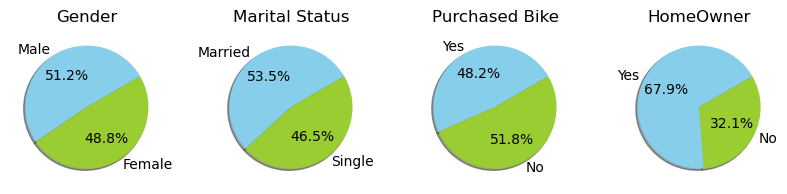

In [23]:
male=len(df[df['Gender']=='M'])
female=len(df[df['Gender']=='F'])

married=len(df[df['MaritalStatus']=='M'])
single=len(df[df['MaritalStatus']=='S'])

purchaseYes=len(df[df['PurchasedBike']=='Yes'])
purchaseNo=len(df[df['PurchasedBike']=='No'])

ownerYes=len(df[df['HomeOwner']=='Yes'])
ownerNo=len(df[df['HomeOwner']=='No'])



explode=(0,0)
colors=['skyblue','yellowgreen']

fig,axs=plt.subplots(1,4,figsize=(8,6))
label="Male", "Female"
size=[male,female]
axs[0].pie(size, labels=label,explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=30)
axs[0].set_title('Gender')

labelmarital="Married","Single"
sizemarital=[married, single]
axs[1].pie(sizemarital, labels=labelmarital, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=30)
axs[1].set_title('Marital Status')

labelpurchase="Yes", "No"
sizepurchase=[purchaseYes, purchaseNo]
axs[2].pie(sizepurchase, labels=labelpurchase, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=30)
axs[2].set_title('Purchased Bike')

labelowner="Yes", "No"
sizeOwner=[ownerYes, ownerNo]
axs[3].pie(sizeOwner, labels=labelowner, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=30)
axs[3].set_title('HomeOwner')

plt.tight_layout()
plt.show()


In [34]:
df=df.drop('ID', axis=1)

df

,MaritalStatus,Gender,Income,Children,Education,Occupation,HomeOwner,Cars,CommuteDistance,Region,Age,PurchasedBike
0,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1021,S,F,20000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,32,Yes
1022,M,F,20000,2,Partial College,Manual,Yes,0,0-1 Miles,Europe,63,No
1023,M,M,10000,0,Partial College,Manual,No,1,0-1 Miles,Pacific,26,Yes
1024,S,F,20000,0,High School,Manual,No,1,5-10 Miles,Europe,31,No


C:\Users\Nikita\AppData\Local\Temp\ipykernel_8456\3467591173.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


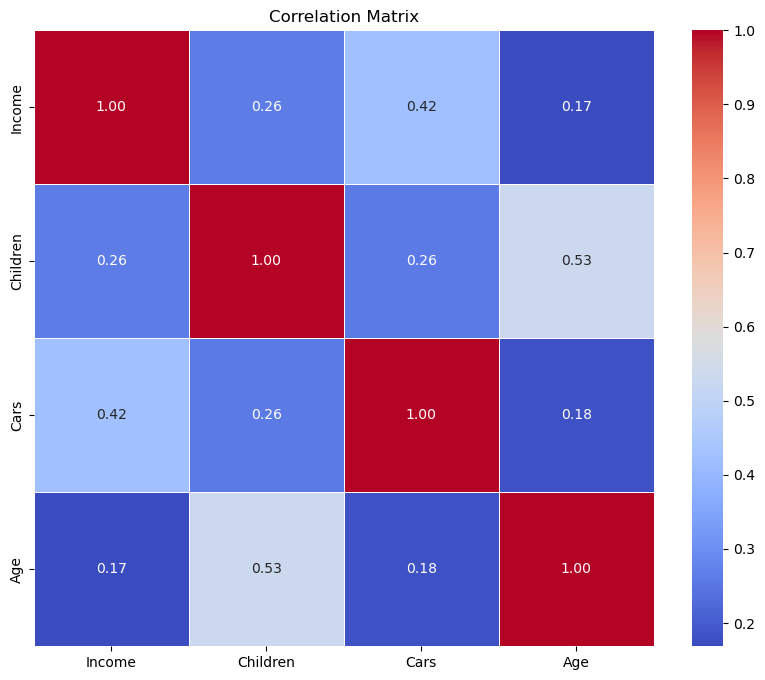

In [35]:

correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

